In [22]:
import re,os,string


In [2]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem.lancaster import LancasterStemmer
from collections import Counter
import matplotlib.pyplot as plt

In [24]:

def read(path):
    fromlist = []                  # creates an empty list for 'from' email ids
    tolist = []                    # creates an empty list for 'to' email ids
    subjectlist = []               # creates an empty list for the subject
    datelist = []                  # creates an empty list for the date
    textlist = []                  # creates an empty list for the email text

  
    
    for file in os.listdir(path):
        with open(os.path.join(path, file), 'r',encoding='utf-8') as contentfile:
            content = contentfile.read()
            
            fromlist.append(re.findall('[\n\r].*From: \s*([^\n\r]*)', content)[0])    
            
            tolist.append(re.findall('[\n\r].*To: \s*([^\n\r]*)', content)[0])             #Appending to tolist
            
            subject = re.findall('Subject: (?s)(.*)Mime-Version', content)[0]               #Appending to tolist
            subject = subject.replace('\n', '')
            subjectlist.append(subject)
            
            datelist.append(re.findall('[\n\r].*Date: \s*([^\n\r]*)', content)[0])       #Appending all dates
            
            text_original = re.findall("(?<=X-FileName:)[.|\n|\W|\w]*", content)[0]          #Appends all email texts
            text = text_original.replace('\n', '')
            text = text.replace('pallen (Non-Privileged).pst', '')
            text = text.replace('pallen.nsf', '')
            textlist.append(text)
            tmp = {''}
            

    data = {}
    data['From'] = fromlist
    data['To'] = tolist
    data['Subject'] = subjectlist
    data['Date'] = datelist
   
    return data


arnoldj = read('midterm\\data\\enron\\enron_mail_20150507\\maildir\\arnold-j\\_sent_mail')

In [25]:
values=[['From','To','Subject','Date']]

from_lis = df_allenp['From']
to_lis = df_allenp['To']
subject_lis = df_allenp['Subject']
date_lis = df_allenp['Date']

for i in range(len(from_lis)):
    tmp = [from_lis[i], to_lis[i], subject_lis[i], date_lis[i]]
    values.append(tmp)

output = open('ro.csv', 'w')
for row in values:
    for column in row:
        output.write('%s;' % column)
        output.write('\n')
output.close()

# Analysis 2
          Display the most contact person

In [27]:
contact_name = []
for each in to_lis:
    x = each.split('@')
    contact_name.append(x[0])
    x= x[1].split('.')[0]
    contact_name.append(x)

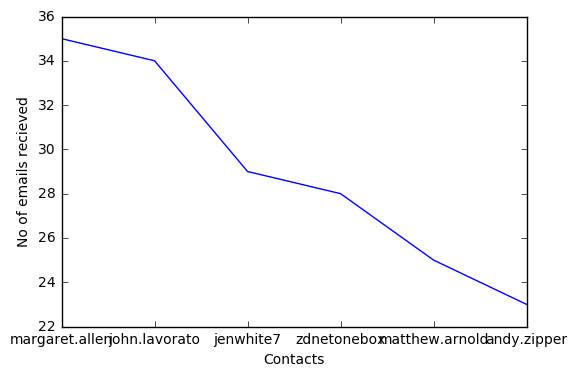

In [30]:
from collections import Counter
import operator
count = dict(Counter(names))
display_names = sorted(count.items(), key=operator.itemgetter(1), reverse = True)


xaxis = []
yaxis = []
x = []
for each in sortednames_x[6:12]:
    xaxis.append(each[0])
    x.append(sortednames_x.index(each))
    yaxis.append(each[1])
    

plt.xticks(x, xaxis)
plt.plot(x, yaxis)
plt.xlabel('Contacts')
plt.ylabel('No of emails recieved')
plt.show()

output = open('ro2.csv', 'w')
for row in display_names:
    for column in row:
        output.write('%s;' % column)
        output.write('\n')
output.close()

# Analysis 3
         Organizations that recieved more number of mails  

In [ ]:
a = []
for each in to_lis:
    x = each.split('@')
    a.append(x[0])
    x= x[1].split('.')[0]
    a.append(x)

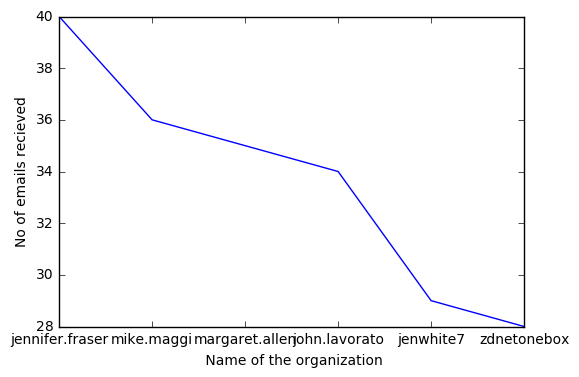

In [31]:
from collections import Counter
import operator
ct = dict(Counter(a))
sortedvalues = sorted(ct.items(), key=operator.itemgetter(1), reverse = True)

xvalue = []
yvalue = []
x = []
for each in sortedvalues[4:10]:
    xvalue.append(each[0])
    x.append(sortedvalues.index(each))
    yvalue.append(each[1])
    

plt.xticks(x, xvalue)
plt.plot(x, yvalue)
plt.xlabel(' Name of the organization')
plt.ylabel('No of emails recieved')
plt.show()

out = open('ro3.csv', 'w')
for row in sorted_x:
    for column in row:
        out.write('%s;' % column)
        out.write('\n')
out.close()